# **SSBU CV4: Predspracovanie a analýza údajov**

Predpracovanie údajov a analýza zahŕňa niekoľko základných fáz, ktoré môžeme aplikovať vo vybranom programovacom jazyku (napr. Python alebo R).  Budeme pracovať s datasetom **U.S. Chronic Disease Indicators (CDI)**, ktorý obsahuje informácie o chronických ochoreniach v USA.

---

## **1. Úvod: Stiahnutie datasetu a základný prehľad**

**Úloha 1.1: Stiahnite dataset**
Chceme stiahnuť dataset **U.S. Chronic Disease Indicators (CDI)** z databázy [data.gov](https://data.gov/).

**Hinty:**
1. Vyhľadajte na stránke dataset s názvom "U.S. Chronic Disease Indicators (CDI)".
2. Zanalyzujte možnosti stiahnutia datasetu.
3. Zanalyzujte možnosti načítania datasetu do DataFrame (použite dokumentáciu k metóde `pd.read_csv(...)`) - [Dokumentácia read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
4. Stiahnite dataset a načítajte ho do premennej `data`.
5. Skontrolujte správne načítanie datasetu.

In [47]:
import pandas as pd
data_url = "https://data.cdc.gov/api/views/hksd-2xuw/rows.csv?accessType=DOWNLOAD"

data = pd.read_csv(data_url)
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD12,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying ...",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


## **2. Fázy predspracovania**
Pri práci s údajmi je často uvádzaných 6 hlavných krokov:
1. Objavovanie (explore)
2. Očistenie (clean)
3. Úpravy (mutate)
4. Popis (describe)
5. Vizualizácia (visualize)
6. Analýza (analyze)

Nasledujúce sekcie ukazujú, ako tieto fázy aplikovať na dataset.

---

## **3. Objavovanie (explore)**

**Objavovanie dát** znamená vytvoriť si prvotný dojem o údajoch. Tento proces zahŕňa napríklad:
- Zistenie, koľko riadkov a stĺpcov údaje obsahujú.
- Preskúmanie, či existujú chýbajúce údaje (null, NaN).
- Overenie, či sú hodnoty v stĺpcoch logické (napr. negatívny vek u pacienta?).
- Prezrenie si základnej štatistiku numerických premenných.

Môžeme použiť:
- `data.info()` – zobrazí počet riadkov, stĺpcov a typy stĺpcov (obj, float, int, category) - [Dokumentácia info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html).
- `data.describe()` – zobrazí štatistiku pre číselné premenné (count, mean, std, min, max, quartiles atď.) - [Dokumentácia describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
- `data.head()` a `data.tail()` – ukážu prvých/posledných pár riadkov - [Dokumentácia head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html), [Dokumentácia tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html).
- `data.columns` – vráti zoznam názvov stĺpcov - [Dokumentácia columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html).

**Prečo to robiť:**
- V praxi takto odhalíte napr. zlé načítanie údajov, extrémne hodnoty, nečakané stĺpce (napr. ID, duplicitné stĺpce), nedefinované hodnoty alebo formátové chyby.


**Úloha:** Vypíšte **posledných 5 riadkov** datasetu.



In [48]:
data.tail()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
309210,2022,2022,VI,Virgin Islands,BRFSS,Tobacco,Quit attempts in the past year among adult cur...,NaN,%,Age-adjusted Prevalence,...,TOB,TOB06,NaN,AGEADJPREV,RACE,AIAN,NaN,NaN,NaN,NaN
309211,2022,2022,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among ad...,NaN,%,Crude Prevalence,...,COPD,COPD01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization,Pneumococcal vaccination among adults aged 65 ...,NaN,%,Crude Prevalence,...,IMM,IMM04,NaN,CRDPREV,RACE,BLK,NaN,NaN,NaN,NaN
309213,2022,2022,VT,Vermont,BRFSS,Social Determinants of Health,Lack of health insurance among adults aged 18-...,NaN,%,Crude Prevalence,...,SDOH,SDH09,NaN,CRDPREV,RACE,HAPI,NaN,NaN,NaN,NaN
309214,2022,2022,WA,Washington,BRFSS,Alcohol,Binge drinking prevalence among adults,NaN,%,Age-adjusted Prevalence,...,ALC,ALC06,NaN,AGEADJPREV,SEX,SEXM,NaN,NaN,NaN,NaN


**Úloha:** Zobrazte zoznam **všetkých stĺpcov** a skontrolujte, či obsahuje stĺpec `LocationDesc`.


In [4]:
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

**Úloha:** Vyberte jeden stĺpec (napr. `YearStart`) a vypíšte jeho unikátne hodnoty. (Použite metódu `unique()`.) - [Dokumentácia unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)

In [49]:
data['YearStart'].unique()

array([2019, 2020, 2021, 2022, 2015, 2016, 2018])

**Kategorické a numerické premenné**
- **Kategorické premenné** sú premenné, ktoré majú obmedzený počet hodnôt (napr. mená, farby, kategórie).
- **Numerické premenné** sú premenné, ktoré majú hodnoty v číselnej forme (napr. vek, výška, cena).
- **Časové premenné** sú špeciálny typ numerických premenných, ktoré reprezentujú čas (napr. dátum, čas, časová zóna).
- **Textové premenné** sú premenné, ktoré obsahujú text (napr. komentáre, popisy).
- **Binárne premenné** sú špeciálny typ kategorických premenných, ktoré majú iba dve hodnoty (napr. True/False, 0/1).

Prečo je dôležité rozlišovať medzi nimi?
- Pri vizualizácii sa používajú rôzne typy grafov pre rôzne typy premenných.
- Pri analýze sa používajú rôzne štatistické metódy pre rôzne typy premenných.
- Pri strojovom učení je potrebné transformovať premenné do vhodného formátu.

Transformácia premenných:
- Kategorické premenné sa môžu transformovať na numerické (napr. One-Hot Encoding).
- Numerické premenné sa môžu transformovať na kategorické (napr. diskretizácia).
- Textové premenné sa môžu transformovať na numerické (napr. TF-IDF).
- Časové premenné sa môžu transformovať na numerické (napr. Unix timestamp).
- Binárne premenné sa môžu transformovať na numerické (0/1) alebo kategorické (True/False).

Vlastnosti numerických premenných:
- **Rozsah hodnôt** - či je hodnota obmedzená (napr. vek) alebo neobmedzená (napr. cena) - [Dokumentácia min](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html), [Dokumentácia max](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html).
- **Variabilita** (Variance) - či sú hodnoty rovnomerne rozložené alebo sa sústreďujú okolo priemeru - [Dokumentácia var](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html).
- **Smerodajná odchýlka** (Standard deviation) - miera variability hodnôt - [Dokumentácia std](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html).
- **Kvartily** (Quartiles) - hodnoty, ktoré rozdeľujú súbor hodnôt na štvrtiny - [Dokumentácia quantile](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html).
- **Medián** (Median) - hodnota, ktorá rozdeľuje súbor hodnôt na dve rovnaké polovice - [Dokumentácia median](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html).
- **Priemer** (Mean) - súčet hodnôt delený počtom hodnôt, ovplyvnený extrémnymi hodnotami - [Dokumentácia mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html).
- **Modus** (Mode) - hodnota, ktorá sa v súbore hodnôt vyskytuje najčastejšie - [Dokumentácia mode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html).

**Úloha:** Zistite, či stĺpec `DataValue` je kategorický alebo numerický. (Použite metódu `dtypes`.) - [Dokumentácia dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

In [50]:
data['YearEnd'].dtypes

dtype('int64')

Triedenie a filtrovanie podľa hodnôt stĺpcov
- **Triedenie** sa vykonáva pomocou metódy `sort_values` - [Dokumentácia sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).
- **Filtrovanie** sa vykonáva pomocou metódy `query` alebo zápisu `data[data['stĺpec'] == hodnota]`.
- **Výber** stĺpcov sa vykonáva pomocou zápisu `data[['stĺpec1', 'stĺpec2']]`.
- **Výber** riadkov sa vykonáva pomocou zápisu `data[riadky]`, kde `riadky` môže byť napr. `data['stĺpec'] > hodnota`.

**Úloha:** Zoraďte dataset podľa stĺpca `YearStart` vzostupne a zobrazte prvých 5 riadkov.

In [51]:
data['YearStart'].sort_values(ascending=True).head()

8780    2015
8778    2015
8776    2015
8775    2015
8805    2015
Name: YearStart, dtype: int64


---

## **4. Očistenie (clean)**

Pri **čistení dát** odstránime chybné, duplicitné alebo chýbajúce hodnoty a urobíme validáciu.

Môžeme použiť:
- `fillna(value)` – doplní chýbajúce hodnoty zadanou hodnotou - [Dokumentácia fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
- `drop(columns=['col1', 'col2'])` – odstráni stĺpce - [Dokumentácia drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
- `drop(index=[0, 1, 2])` – odstráni riadky podľa indexov - [Dokumentácia drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
- `dropna()` – vyhodí riadky, ktoré majú aspoň v jednom stĺpci chýbajúce hodnoty - [Dokumentácia dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
- `drop_duplicates()` – odstráni duplicitné riadky - [Dokumentácia drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
- Zmena typov: `data['Topic'] = data['Topic'].astype('category')` - mení typ stĺpca na kategorický - [Dokumentácia astype](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html)
- Overovanie logiky: Môžeme napr. odfiltrovať záznamy, kde `YearStart < 2000` (ak vieme, že staršie roky sú nerelevantné).

**Prečo to robiť:**
- Chýbajúce údaje môžu skresliť výsledky analýzy.
- Duplicitné riadky môžu spôsobiť chyby vovýsledkoch štatistík.
- Nesprávne typy môžu brániť vo výpočtoch alebo vizualizácii.

**Príklad**

In [52]:
# drop the NA values in the 'DataValue' column
data_clean = data.dropna(subset=['DataValue'])

# drop duplicates
data_clean = data_clean.drop_duplicates()

# change the data type of the 'Topic' column to category
data_clean['Topic'] = data_clean['Topic'].astype('category')

**Úloha:** Zistite, koľko chýbajúcich hodnôt obsahuje stĺpec `HighConfidenceLimit`. Použite metódy `isnull()` a `sum()`. - [Dokumentácia isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html), [Dokumentácia sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)


In [53]:
data_clean['HighConfidenceLimit'].isnull().sum()

np.int64(20306)

**Úloha:** Vytvorte nový DataFrame `data_no_na` a odstráňte všetky riadky, kde chýba `HighConfidenceLimit`. Použite parameter `subset` v metóde `dropna()`. - [Dokumentácia dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)


In [54]:
data_no_na = data.dropna(subset=['HighConfidenceLimit'])


**Úloha:** Overte, že `data_no_na` nemá žiadne chýbajúce hodnoty v danom stĺpci.


In [55]:
num = data_no_na['HighConfidenceLimit'].isnull().sum()
print(num)

0


**Redukcia dát:**
- **Odstránenie stĺpcov** s nízkou informačnou hodnotou.
- **Odstránenie riadkov** s chýbajúcimi hodnotami, prípadne s hodnotami ktoré pre nás nie sú podstatné.

**Príklad:** Z datasetu vybrerieme len množinu stĺpcov, ktorá nás zaujíma, a odstránime nepotrebné stĺpce. Z údajov ďalej použijeme iba tie, ktoré sú pre nás relevantné, napr. tie, kde je hodnota `YearStart` väčšia ako 2015.


In [56]:
data_selected = data_clean[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'TopicID', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1']]
data_selected = data_selected[data_selected['YearStart'] > 2015]

data_selected

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,TopicID,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,DIA,Diabetes among adults,%,Crude Prevalence,13.6,13.6,12.1,15.4,Sex,Male
1,2019,2019,ID,Idaho,BRFSS,Diabetes,DIA,Diabetes among adults,%,Crude Prevalence,10.6,10.6,9.1,12.2,Sex,Male
3,2019,2019,IA,Iowa,NVSS,Asthma,AST,"Asthma mortality among all people, underlying ...",Number,Number,54.0,54.0,NaN,NaN,Overall,Overall
4,2019,2019,IA,Iowa,BRFSS,Asthma,AST,Current asthma among adults,%,Crude Prevalence,10.3,10.3,9.1,11.7,Age,Age 18-44
5,2019,2019,IA,Iowa,NVSS,Diabetes,DIA,"Diabetes mortality among all people, underlyin...",Number,Number,54.0,54.0,NaN,NaN,Age,Age 0-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309208,2022,2022,VT,Vermont,BRFSS,Sleep,SLEP,Short sleep duration among adults,%,Crude Prevalence,26.5,26.5,16.8,39.3,Race/Ethnicity,"Asian, non-Hispanic"
309209,2022,2022,VI,Virgin Islands,BRFSS,Immunization,IMM,Influenza vaccination among adults,%,Crude Prevalence,34.2,34.2,24.2,45.8,Age,Age >=65
309211,2022,2022,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,COPD,Chronic obstructive pulmonary disease among ad...,%,Crude Prevalence,14.0,14.0,12.8,15.2,Overall,Overall
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization,IMM,Pneumococcal vaccination among adults aged 65 ...,%,Crude Prevalence,64.2,64.2,52.2,74.6,Race/Ethnicity,"Black, non-Hispanic"


---

## **5. Úpravy (mutate)**

Po vyčistení môže nasledovať **úprava údajov**:
- Prekódovanie názvov stĺpcov
- Výpočet nových stĺpcov
- Pivotovanie dát (zmena tvaru tabuľky)
- Zoskupovanie dát a agregácia
- Normalizácia, škálovanie, transformácia

Ako príklad môžeme vytvoriť nový stĺpec, ktorý bude obsahovať rozdiel medzi hornou a dolnou medzou spoľahlivosti, alebo môžeme vytvoriť pivot tabuľku pre lepšiu vizualizáciu.

Môžeme použiť:
+ `rename(columns={'oldName':'newName'})` – premenovanie stĺpcov.
+ `data['Sum'] = data['Col1'] + data['Col2']` – vytvorenie nového stĺpca ako kombinácie iných stĺpcov.
+ `data.pivot_table(values='DataValue', index='LocationAbbr', columns='YearStart', aggfunc='mean')` – vytvorí pivotovú tabuľku údajov - [Dokumentácia pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html)
- Ďalšie metódy: `map()`, `apply()`, `transform()`, `groupby()`, `merge()`, atď.

**Prečo to robiť**
- Vytváranie nových stĺpcov môže pomôcť pri analýze dát.
- Pivotovanie dát môže zjednodušiť vizualizáciu alebo analýzu.
- Prekódovanie názvov stĺpcov môže zlepšiť čitateľnosť dát.
- Zoskupovanie dát môže zjednodušiť analýzu.
- Normalizácia môže pomôcť pri strojovom učení.
- Transformácia môže zlepšiť výsledky modelov.


**Príklad**

In [59]:
# rename the column
data_selected = data_selected.rename(columns={'DataValueAlt': 'DataValueNum'})

# create new column
data_selected['Diff'] = data_selected['HighConfidenceLimit'] - data_selected['LowConfidenceLimit']

# pivot table
pivot_df = data_selected.pivot_table(
    values='DataValueNum',
    index='LocationAbbr',
    columns='YearStart',
    aggfunc='mean'
)

pivot_df.head()

YearStart,2016,2018,2019,2020,2021,2022
LocationAbbr,,,,,,
AK,184.313821,51.341463,53.381902,63.025115,60.114995,24.554213
AL,1038.134091,49.397222,373.527853,451.818221,382.585563,27.067181
AR,716.044186,48.507692,256.516405,307.476627,250.692221,28.357905
AZ,1083.466000,48.510811,324.061665,382.306401,323.188238,25.433226
CA,4848.900629,46.315789,1348.755178,1701.187944,1458.497247,24.688761


**Úloha:** Premenujte stĺpec `DataValueType` na `ValueType`.



In [60]:
data_selected.rename(columns={'DataValueType': 'ValueType'})


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,TopicID,Question,DataValueUnit,ValueType,DataValue,DataValueNum,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Diff
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,DIA,Diabetes among adults,%,Crude Prevalence,13.6,13.6,12.1,15.4,Sex,Male,3.3
1,2019,2019,ID,Idaho,BRFSS,Diabetes,DIA,Diabetes among adults,%,Crude Prevalence,10.6,10.6,9.1,12.2,Sex,Male,3.1
3,2019,2019,IA,Iowa,NVSS,Asthma,AST,"Asthma mortality among all people, underlying ...",Number,Number,54.0,54.0,NaN,NaN,Overall,Overall,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,AST,Current asthma among adults,%,Crude Prevalence,10.3,10.3,9.1,11.7,Age,Age 18-44,2.6
5,2019,2019,IA,Iowa,NVSS,Diabetes,DIA,"Diabetes mortality among all people, underlyin...",Number,Number,54.0,54.0,NaN,NaN,Age,Age 0-44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309208,2022,2022,VT,Vermont,BRFSS,Sleep,SLEP,Short sleep duration among adults,%,Crude Prevalence,26.5,26.5,16.8,39.3,Race/Ethnicity,"Asian, non-Hispanic",22.5
309209,2022,2022,VI,Virgin Islands,BRFSS,Immunization,IMM,Influenza vaccination among adults,%,Crude Prevalence,34.2,34.2,24.2,45.8,Age,Age >=65,21.6
309211,2022,2022,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,COPD,Chronic obstructive pulmonary disease among ad...,%,Crude Prevalence,14.0,14.0,12.8,15.2,Overall,Overall,2.4
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization,IMM,Pneumococcal vaccination among adults aged 65 ...,%,Crude Prevalence,64.2,64.2,52.2,74.6,Race/Ethnicity,"Black, non-Hispanic",22.4


**Úloha:** Vytvorte kontingenčnú (pivotovú) tabuľku pre stĺpce `Topic` (index) a `LocationAbbr` (columns), kde `values` bude priemerná hodnota `DataValueNum`. (Použite parameter observed=False pre potlačenie upozornenia.)


In [61]:
pivot_df = data_selected.pivot_table(
    values='DataValueNum',
    index='LocationAbbr',
    columns='Topic',
    aggfunc='mean',
    observed=False
)

**Úloha:** Vytvorte nový stĺpec `Range` ako rozdiel `HighConfidenceLimit - LowConfidenceLimit`.

In [62]:
data_selected['Range'] = data_selected['HighConfidenceLimit'] - data_selected['LowConfidenceLimit']

**Úloha:** Vytvorte stĺpec `HighVal`, ktorý binárne označí, či je daný záznam „vysoký“ alebo „nízky“. Ako podmienku pre odlíšenie záznamov použite stĺpec `DataValueNum`, pričom hraničná hodnota bude väčšia ako 50. Metóda astype() vytvorí z bool hodnôt 0 a 1 - [Dokumentácia astype](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html).

 Hint: Použite `(data_clean["DataValueNum"] > 50).astype(int)`.


In [63]:
data_selected['HighVal'] = (data_selected['DataValueNum'] > 50).astype(int)

---

## **6. Popis (describe)**

Popis dát slúži na to, aby sme získali **základný prehľad o rozdelení hodnôt** v datasetoch.

Môžeme použiť:
- `describe()` – poskytne súhrnnú štatistiku (mean, std, min, max, quartiles).
- `groupby()` – umožní zoskupiť dáta podľa určitej kategórie a potom vykonať agregácie (napr. min, max, mean, median, count, atď.) - [Dokumentácia groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).
- `plot(kind='xxx')` – umožní vizualizovať distribúciu hodnôt (napr. histogram, boxplot, atď.).
- `corr()` – vypočíta korelácie medzi numerickými stĺpcami - [Dokumentácia corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
- `ttest_ind()` – vykoná t-test na overenie hypotéz - [Dokumentácia ttest_ind](https://docs.scipy.org/docs/scipy/reference/generated/scipy.stats.ttest_ind.html)
- `zscore()` – vypočíta z-score pre detekciu outlierov - [Dokumentácia zscore](https://docs.scipy.org/docs/scipy/reference/generated/scipy.stats.zscore.html)
- `agg()` – umožní aplikovať viacero agregácií naraz - [Dokumentácia agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)
- Ďalšie metódy: `mean()`, `median()`, `std()`, `count()`, `min()`, `max()`, atď.

**Prečo to robiť:**
- Zistíme, či v datasetoch nemáme extrémne hodnoty (outliers) alebo nekonzistentné dáta.
- Porovnáme priemer vs. medián (ak je medzi nimi veľký rozdiel, môžeme mať 'skewed' distribúciu údajov).
- Zistíme, či sú dáta normálne distribuované.

**Príklad**

In [64]:
# Groupby + aggregation
data_summary = data_selected.groupby('LocationAbbr', observed=False).agg(
    MinValue=('DataValueNum', 'min'),
    MaxValue=('DataValueNum', 'max'),
    MeanVal=('DataValueNum', 'mean'),
    StdVal=('DataValueNum', 'std'),
    CountVal=('DataValueNum', 'count')
)
data_summary.head()

,MinValue,MaxValue,MeanVal,StdVal,CountVal
LocationAbbr,,,,,
AK,0.0,3180.0,56.777583,163.346717,3571
AL,0.0,57830.0,365.767951,2482.880022,3650
AR,0.0,34577.0,249.213576,1566.815654,3722
AZ,0.0,50228.0,318.621624,2224.388112,4329
CA,0.0,221537.0,1360.462171,9493.267494,4261


**Úloha:** Vytvorte `groupby` pre stĺpec `Topic` a vypočítajte priemer a medián pre stĺpec `DataValueNum`. Výsledok uložte do premennej `topic_stats`. Ďalej vypíšte aj počet hodnôt (count) pre každý `Topic`.


In [66]:
data_summary = data_selected.groupby('Topic', observed=False).agg(
    MinValue=('DataValueNum', 'min'),
    MaxValue=('DataValueNum', 'max'),
    MeanVal=('DataValueNum', 'mean'),
    StdVal=('DataValueNum', 'std'),
    CountVal=('DataValueNum', 'count')
)
data_summary.head()

,MinValue,MaxValue,MeanVal,StdVal,CountVal
Topic,,,,,
Alcohol,0.0,56585.0,84.916572,1108.874775,16398
Arthritis,0.0,92.3,31.859992,18.494868,11960
Asthma,0.0,4145.0,23.527662,135.405133,5231
Cancer,0.9,1754343.0,2057.055715,35364.854757,9518
Cardiovascular Disease,0.6,805708.0,1860.673527,19614.445182,23393


**Úloha:** Urobte to isté pre `LocationAbbr`, ale pridajte aj min/max.

In [ ]:
# TODO

---

## **7. Vizualizácia (visualize)**

Vizualizácia je **kľúčová** na odhalenie vzťahov alebo extrémnych hodnôt, ktoré by sme inak prehliadli. Pomocou grafov môžeme zobraziť distribúciu hodnôt, korelácie, zhlukovanie alebo vzory v dátach.

Môžeme použiť:
- Knižnicu **matplotlib**, ktorá umožňuje pomocou metódy `plot` vytvárať rôzne grafy - [Dokumentácia matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).
- Často sa používa aj **pandas** `.plot(kind='xxx')`, kde `xxx` je `line`, `bar`, `hist`, `box` atď.
- Prípadne môžeme použiť **seaborn** na pokročilejšiu vizualizáciu (kategórie s farebným rozlíšením, hustotné grafy, atď.).

Môžeme použiť: (knižnica **Pandas**)
- `plot(kind='xxx')` – zobrazí daný typ grafu (line, bar, hist, box, scatter, pie, atď.) - [Dokumentácia plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- `plot.bar()` – stĺpcový graf - [Dokumentácia bar](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
- `plot.hist()` – histogram - [Dokumentácia hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)
- `plot.box()` – boxplot - [Dokumentácia box](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)
- `plot.scatter()` – scatterplot - [Dokumentácia scatter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
- `plot.pie()` – koláčový graf - [Dokumentácia pie](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)
- Ďalšie metódy: `plot.line()`, `plot.area()`, `plot.barh()`, `plot.kde()`, `plot.hexbin()`, atď.
- **Seaborn**: `sns.barplot()`, `sns.boxplot()`, `sns.heatmap()`, `sns.scatterplot()`, `sns.pairplot()`, atď.
- **Matplotlib**: `plt.plot()`, `plt.bar()`, `plt.hist()`, `plt.boxplot()`, `plt.scatter()`, `plt.pie()`, atď.s

**Prečo to robiť**
- Vizualizácia pomáha odhaliť vzory, korelácie alebo extrémne hodnoty.
- Pomáha pri interpretácii dát a komunikácii výsledkov.
- Môžeme použiť aj interaktívne vizualizačné nástroje ako **plotly** alebo **bokeh**.
- Vizualizácia je dôležitá aj pri tvorbe prezentácií alebo reportov.
- Môžeme použiť aj **tableau** alebo **powerBI** na vizualizáciu.

**Príklad** - Ktoré témy (Topic) majú najvyššie priemerné hodnoty?

Hint: Potrebujeme zistiť priemernú hodnotu `DataValueNum` pre každý `Topic`. Výsledky je potrebné zoradiť zostupne a vizualizovať niekoľko (napr. 10) prvých tém s najvyššou priemernou hodnotou v grafe (napr. stĺpcový graf).

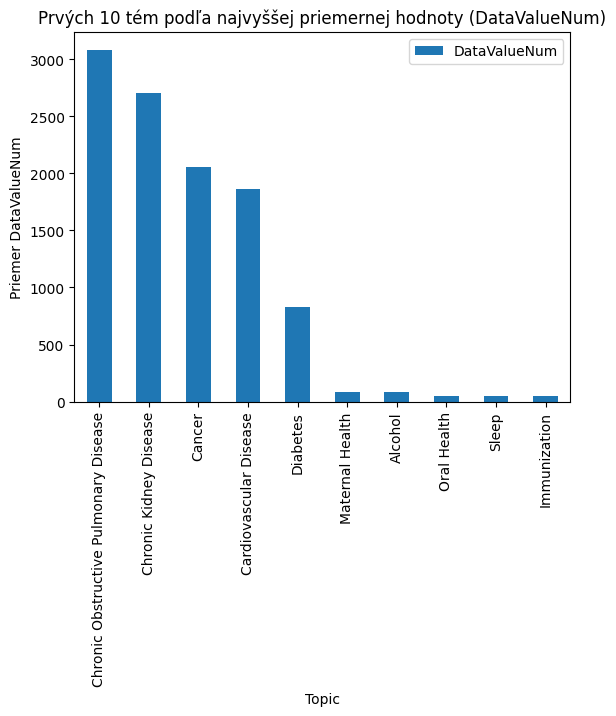

In [67]:
import matplotlib.pyplot as plt

# calculate the mean 'DataValueNum' for each 'Topic'
topic_means = data_selected.groupby('Topic', observed=False)['DataValueNum'].mean().reset_index() # reset_index() to convert the result to a DataFrame

# sort the topics by the mean 'DataValueNum' in descending order
topic_means_sorted = topic_means.sort_values(by='DataValueNum', ascending=False)

# select the top 10 topics
top10 = topic_means_sorted.head(10)

# plot the bar chart
top10.plot(kind='bar', x='Topic', y='DataValueNum')
plt.title('Prvých 10 tém podľa najvyššej priemernej hodnoty (DataValueNum)')
plt.xlabel('Topic')
plt.ylabel('Priemer DataValueNum')
plt.show()

**Interpretácia:** Dokážeme rýchlo identifikovať, ktoré oblasti (kardiovaskulárne ochorenia, cukrovka, chronické ochorenia, atď.) vykazujú v datasete najvyššie číselné hodnoty. Napríklad, keď je `DataValueNum` prevalencia, ukáže sa, pri ktorých ochoreniach je na úrovni datasetu priemerná prevalencia najvyššia. (Pre dôkladnejšiu analýzu by sme mali zvážiť aj iné faktory, ako napr. počet záznamov, rozsah hodnôt, atď.)

---

**Úloha:** Porovnajte priemery `DataValueNum` naprieč jednotlivými štátmi. Analýzu urobte pre konkrétny Topic (napr. Diabetes).

Hint: Vyfiltrujte hodnoty pre vybraný Topic. Zistite priemernú hodnotu DataValueNum pre každý štát (LocationAbbr).
Zoradené výsledky vypíšte a vytvorte stĺpcový graf pre Top 5 aj Bottom 5 lokalít.

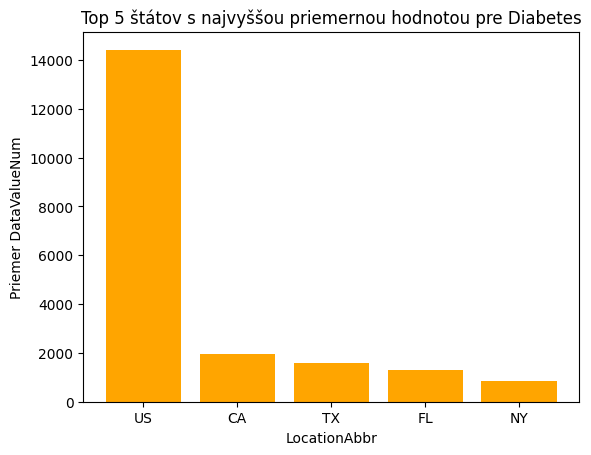

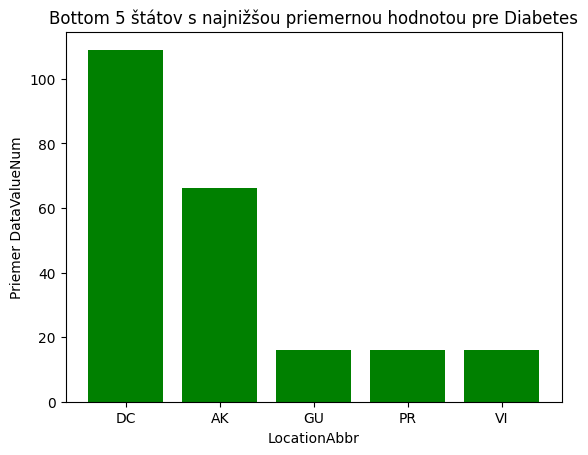

In [68]:
# filter the data for the selected topic
# TODO

# calculate the mean 'DataValueNum' for each 'LocationAbbr' (use reset_index() to convert the result to a DataFrame)
# TODO

# sort the states by the mean 'DataValueNum' in descending order
# TODO

# select the top 5 and bottom 5 states

# plot the bar chart for the top 5 states

# plot the bar chart for the bottom 5 states
# TODO

selected_topic = 'Diabetes'

filtered_data = data_selected[data_selected['Topic'] == selected_topic]

state_means = filtered_data.groupby('LocationAbbr')['DataValueNum'].mean().reset_index()

state_means_sorted = state_means.sort_values(by='DataValueNum', ascending=False)

top5 = state_means_sorted.head(5)

bottom5 = state_means_sorted.tail(5)

plt.bar(top5['LocationAbbr'], top5['DataValueNum'], color='orange')

plt.title(f'Top 5 štátov s najvyššou priemernou hodnotou pre {selected_topic}')

plt.xlabel('LocationAbbr')

plt.ylabel('Priemer DataValueNum')

plt.show()

plt.bar(bottom5['LocationAbbr'], bottom5['DataValueNum'], color='green')

plt.title(f'Bottom 5 štátov s najnižšou priemernou hodnotou pre {selected_topic}')

plt.xlabel('LocationAbbr')

plt.ylabel('Priemer DataValueNum')

plt.show()


**Úloha:** Zobrazte trend v čase (time series) pre vybraný štát a tému (zistite, ako sa mení `DataValueNum` v čase. Pre vizualizáciu použite **line plot**. (Použite parameter `marker='o'` pre vizualizáciu dátových bodov v trende) **Keďže údaje v datasete pochádzajú z rôznych prieskumov a boli zbierané naprieč rôznymi skupinami, je potrebné pri filtrovaní vybrať aj konkrétnu skupinu pre `ValueType` (napr. hodnota `Crude Prevalence`) a `StratificationCategory1` (napr. hodnota `Overall`)**

Hint:
Zvoľte si konkrétny štát (napr. CA), tému (napr. Asthma), typ hodnoty (napr. Crude Prevalence) a kategóriu (napr. Overall).
Vyfiltrujte dáta podľa výberu z predošlého kroku, aby zostali len záznamy, ktoré spĺňajú vybrané kritériá.
Vytvorte čiarový graf (line plot), kde na osi X je `YearStart` a na osi Y je `DataValueNum`.
Interpretujte výsledný trend.

In [70]:
# filter the data for the selected state and topic
# TODO

# plot the line chart
# TODO

selected_state = 'CA'
selected_topic = 'Asthma'

filtered_data = data_selected[
    (data_selected['LocationAbbr'] == selected_state) &
    (data_selected['Topic'] == selected_topic) &
    (data_selected['ValueType'] == 'Crude Prevalence') &
    (data_selected['StratificationCategory1'] == 'Overall')]

plt.figure(figsize=(8,5))
plt.plot(filtered_data['YearStart'], filtered_data['DataValueNum'], marker='o')

plt.title(f'Trend {selected_topic} v {selected_state} (v čase)')
plt.xlabel('Rok (YearStart)')
plt.ylabel('DataValueNum')
plt.grid(True)
plt.show()



KeyError: 'ValueType'

**Interpretácia:** Ak DataValueNum reprezentuje napr. percento obéznych ľudí, vidíme, ako sa miera obezity menila v priebehu rokov v Kalifornii.

---

**Úloha:** Vytvorte koláčový graf (`pie` chart) pre počet hodnôt v kategóriách premennej `Topic`. Dáva použitie tohto grafu zmysel ?

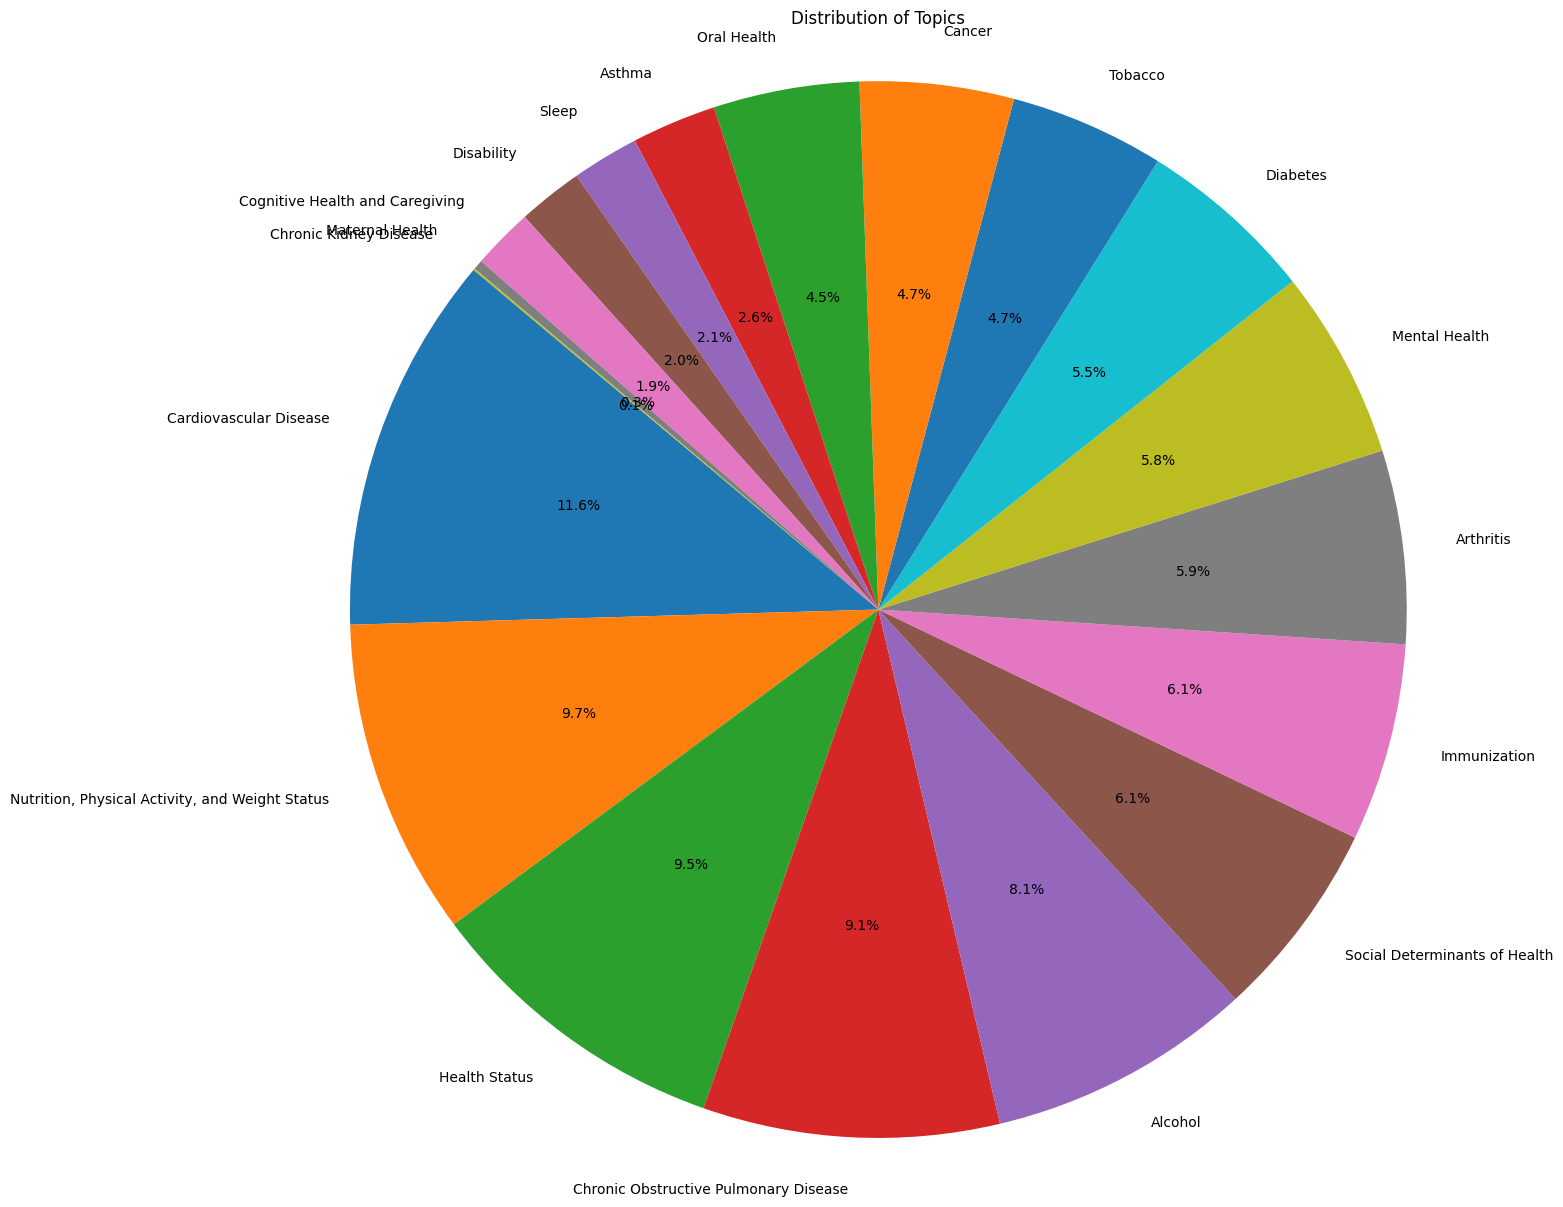

In [26]:
topic_counts = data_selected['Topic'].value_counts()

# Create a pie chart
plt.figure(figsize=(15, 15))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

**Príklad:** Porovnanie priemerných hodnôt `DataValueNum` pre vybrané roky (2019, 2020, 2021) pomocou viacerých stĺpcových grafov. Zobrazenie viacerých grafov v jednom obrázku nastavíte parametrom `subplots=True`. Metóda `pivot_table` vytvorí tabuľku, kde riadky budú `LocationAbbr` a stĺpce `YearStart`. Metóda `.isin()` umožní filtrovať dáta podľa zoznamu hodnôt - [Dokumentácia isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html).


C:\Users\sherl\AppData\Local\Temp\ipykernel_18392\725230986.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = data_selected[data_clean['YearStart'].isin(selected_years)]


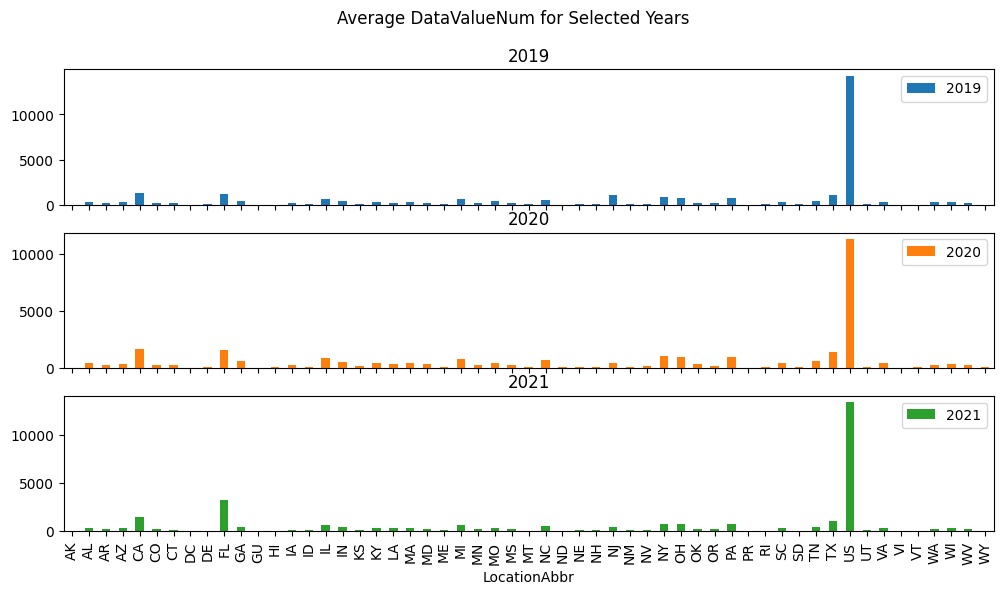

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the selected years
selected_years = [2019, 2020, 2021]
filtered_data = data_selected[data_clean['YearStart'].isin(selected_years)]

# Create a pivot table with 'LocationAbbr' as index and 'YearStart' as columns
pivot_table = filtered_data.pivot_table(
    values='DataValueNum',
    index='LocationAbbr',
    columns='YearStart',
    aggfunc='mean'
)

# Plot the bar chart
pivot_table.plot(kind='bar', figsize=(12, 6), subplots=True)
plt.suptitle('Average DataValueNum for Selected Years')
plt.show()

---

## **8. Analýza (analyze)**

V tejto fáze môžeme použiť rôzne **štatistické metódy** (napr. korelácia, testy hypotéz) alebo **strojové učenie** (napr. regresiu, klasifikáciu) na predikciu alebo zhlukovanie dát.

- **Korelácia**: zistíme, ako spolu súvisia dva (či viac) numerických stĺpcov.
- **Regresia**: ak chceme predpovedať `DataValueNum` na základe iných premenných.
- **Klasifikácia**: ak by sme mali stĺpec s triedami (napr. `Topic` s viacerými kategóriami) a chceli by sme predikovať.
- **Zhlukovanie (clustering)**: ak hľadáme skupiny podobných záznamov.
- **Hypotézy**: testy hypotéz (t-test, ANOVA) nám pomôžu overiť, či sú dáta štatisticky signifikantné.
- **Outlier detection**: detekcia extrémnych hodnôt, ktoré môžu narušiť analýzu.
- **Ďalšie**: PCA, feature selection, cross-validation, atď.
- Môžeme použiť aj **neurónové siete** alebo **reinforcement learning**.

Môžeme použiť:
- .corr() – vypočíta korelácie medzi numerickými stĺpcami - [Dokumentácia corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
- ttest_ind() – vykoná t-test na overenie hypotéz - [Dokumentácia ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
- zscore() – vypočíta z-score pre detekciu outlierov - [Dokumentácia zscore](https://docs.scipy.org/docs/scipy/reference/generated/scipy.stats.zscore.html)

+ **Knižnice**: Na analýzu dát môžeme použiť **scikit-learn**, **statsmodels**, **seaborn**, **scipy**, **numpy**, **pandas**, **torch** alebo **tensorflow**.

**Prečo to robiť**
- Pomáha nám to pochopiť dáta a vzťahy medzi nimi.
- Môžeme odhaliť zaujímavé vzory alebo trendy.
- Môžeme predikovať budúce hodnoty alebo klasifikovať nové záznamy.
- Môžeme overiť hypotézy alebo zistiť, či sú dáta štatisticky signifikantné.
- Môžeme detegovať outlierov alebo zhlukovať podobné záznamy.
- Môžeme vytvoriť prediktívne modely pre rôzne úlohy.


Korelácia popisuje vzájomné vzťahy medzi premennými. Premenné sa môžu navzájom ovplyvňovať, čo môže byť lineárne alebo nelineárne. Vizualizácia korelácie je užitočná pre jednoduché pochopenie, či je možné pomocou vybraných premenných jednoznačne oddeliť hodnoty závislej premennej.
    - Hodnota korelácie je v intervale <-1, 1>
    - pozitívna (1) - so zvyšovaním jednej premennej sa zvyšuje aj druhá
    - negatívna (-1) - so zvyšovaním jednej premennej sa druhá premenná znižuje
    - nulová (0) - premenné sa neovplyvňujú

Korelácia neznamená kauzalitu - dva javy sa môžu ukazovať ako závislé, ale neznamená to, že jeden spôsobuje vznik druhého.

**Príklad** – Korelácia

In [27]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


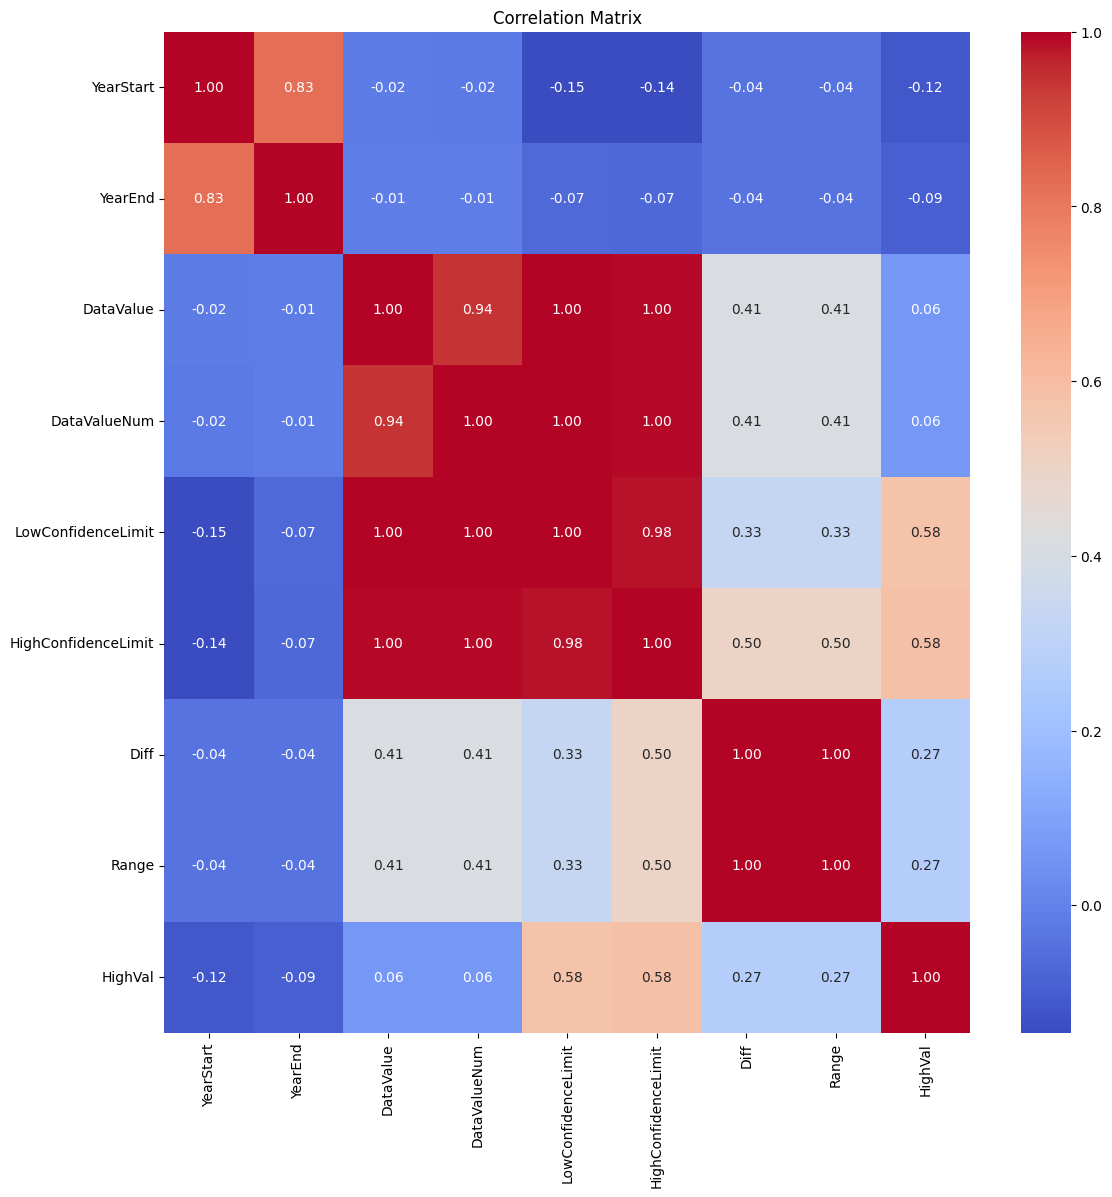

In [37]:
import seaborn as sns

plt.figure(figsize=(13, 13))
# Korelačná matica (numeric_only=True v novších verziách Pandas)
corr_matrix = data_selected.corr(numeric_only=True)

# Teplotná mapa korelácií
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Úloha:** Vytvorte korelačnú maticu pre vybrané témy z vyfiltrovaných údajov. Pri vytváraní vyfiltrovaných údajov vytvorte pivot tabuľku pre lokality (`LocationAbbr`) ako index a `Topic` ako stĺpce. Ako hodnoty použite priemernú hodnotu `DataValueNum`.
 Ďalej zvážte len hodnoty pre rok 2020 a typ hodnoty `Crude Prevalence`.
 a zobrazte ju pomocou heatmapy. Aké závislosti medzi premennými vidíte?

Hint:
Zvoľte si konkrétne témy (napr. Diabetes, Cancer, Obesity).
Vyfiltrujte dáta pre vybrané témy.
Vyfiltrujte dáta podľa `YearStart` pre rok 2020 a `ValueType` pre `Crude Prevalence`, aby boli analyzované dáta rovnakého typu.
Vytvorte pivot tabuľku pre lokality (`LocationAbbr`) ako index a `Topic` ako stĺpce. Ako hodnoty použite priemernú hodnotu `DataValueNum`.
Vypočítajte korelačnú maticu.
Zobrazte heatmapu korelačnej matice.


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overenie dostupných hodnôt v stĺpci 'Topic'
print(data_clean['Topic'].cat.categories)

# Vybrané témy na analýzu
selected_topics = [
    'Chronic Obstructive Pulmonary Disease', 'Cognitive Health and Caregiving',
    'Diabetes', 'Disability', 'Health Status', 'Immunization', 'Maternal Health',
    'Mental Health', 'Nutrition, Physical Activity, and Weight Status',
    'Oral Health', 'Sleep', 'Social Determinants of Health', 'Tobacco'
]

# Overenie, či 'Topic' existuje v data_selected
print("Columns in data_selected:", data_selected.columns)

# Filtrovanie dát podľa vybraných tém
filtered = data_selected[data_selected['Topic'].isin(selected_topics)]

# Overenie, či 'YearStart' a 'ValueType' existujú
if 'YearStart' not in filtered.columns or 'ValueType' not in filtered.columns:
    raise KeyError("Jeden z potrebných stĺpcov ('YearStart' alebo 'ValueType') neexistuje v dátach.")

# Filtrovanie podľa roku 2020 a typu hodnoty 'Crude Prevalence'
filtered = filtered[(filtered['YearStart'] == 2020) & (filtered['ValueType'] == 'Crude Prevalence')]

# Overenie, či po filtrovaní ostali nejaké dáta
if filtered.empty:
    raise ValueError("Filtrované dáta sú prázdne. Skontrolujte kritériá filtrovania.")

# Pivotná tabuľka
pivot_df = filtered.pivot_table(
    values='DataValueNum',
    index='LocationAbbr',
    columns='Topic',
    aggfunc='mean'
)

# Overenie, či pivotná tabuľka obsahuje dáta
if pivot_df.empty:
    raise ValueError("Pivotná tabuľka je prázdna. Skontrolujte vstupné dáta.")

# Korelačná matica
corr_matrix = pivot_df.corr()

# Vykreslenie heatmapy
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelačná matica vybraných rizikových faktorov (2020)')
plt.show()


Index(['Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Cardiovascular Disease',
       'Chronic Kidney Disease', 'Chronic Obstructive Pulmonary Disease',
       'Cognitive Health and Caregiving', 'Diabetes', 'Disability',
       'Health Status', 'Immunization', 'Maternal Health', 'Mental Health',
       'Nutrition, Physical Activity, and Weight Status', 'Oral Health',
       'Sleep', 'Social Determinants of Health', 'Tobacco'],
      dtype='object')
Columns in data_selected: Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'TopicID', 'Question', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueNum', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'Diff', 'Range', 'HighVal'],
      dtype='object')


KeyError: "Jeden z potrebných stĺpcov ('YearStart' alebo 'ValueType') neexistuje v dátach."

**Úloha:** Uveďte medzi ktorými témami je najvyššia korelácia a aké závislosti medzi nimi vidíte?

**Príklad** – Jednoduchý test hypotézy

**T-test**
- Štatistický test, ktorý sa používa na porovnávanie priemerných hodnôt medzi dvoma (alebo niekedy jednou) skupinami.
- Cieľom je zistiť, či sa pozorované rozdiely v priemeroch dajú pripísať náhode, alebo či sú štatisticky významné.

Jednovýberový t-test (one-sample t-test): Porovnáva priemer jednej skupiny voči nejakej známej (teoretickej) hodnote.

Dvojvýberový t-test (two-sample t-test): Porovnáva priemery dvoch nezávislých skupín (napr. experimentálna vs. kontrolná skupina).

Párový t-test (paired t-test): Porovnáva priemery dvoch meraní na tých istých subjektoch (napr. pred a po intervencii).

Pomocou t-testu môžeme napr. overiť, či je priemerné `DataValueNum` pre tému `Diabetes` signifikantne vyššie než pre tému `Asthma` - [Dokumentácia ttest_ind](https://docs.scipy.org/docs/scipy/reference/generated/scipy.stats.ttest_ind.html).

hodnota t-stat:
Vyjadruje hodnotu, o koľko štandardných chýb sa priemer jednej (alebo rozdiel priemerov dvoch) skupiny(-n) odchýli od teoretickej nulovej hypotézy.

p-hodnota:
Vyjadruje pravdepodobnosť, že dostaneme taký alebo ešte väčší rozdiel (resp. vyššiu t-štatistiku), ak by nulová hypotéza bola v skutočnosti pravdivá (teda ak by medzi skupinami nebol skutočný rozdiel).
Ak je p-hodnota veľmi malá (napríklad menšia ako 0,05), zvyčajne hovoríme, že rozdiel je štatisticky významný – je málo pravdepodobné, že vznikol čisto náhodou.
Ak je p-hodnota veľká (napr. > 0,05), pozorovaný rozdiel môže byť dôsledkom náhodnej variability a nemôžeme zamietnuť nulovú hypotézu.

In [33]:
# pip install scipy

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
    --------------------------------------- 0.8/41.0 MB 3.2 MB/s eta 0:00:13
   - -------------------------------------- 1.3/41.0 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.6/41.0 MB 2.7 MB/s eta 0:00:15
   -- ------------------------------------- 2.1/41.0 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.4/41.0 MB 2.1 MB/s eta 0:00:18
   -- ------------------------------------- 2.9/41.0 MB 2.1 MB/s eta 0:00:19
   --- ------------------------------------ 3.1/41.0 MB 2.0 MB/s eta 0:00:19
   --- ------------------------------------ 3.7/41.0 MB 2.1 MB/s eta 0:00:18
   ---- ----------------------------------- 4.2/41.0 MB 2.2 MB/s eta 0:00:18
   ---- ----------------------------------- 4.7/41.0 MB 2.2 MB/s eta 0:00:17
   ----- ---------------------------------- 5.2/41.0 MB 2.2 MB/s eta 0:00:17
   ----- ----

In [46]:
from scipy.stats import ttest_ind

diabetes_vals = data_selected.loc[(data_selected['Topic']=='Tobacco') & (data_selected['ValueType']=='Crude Prevalence'), 'DataValueNum'].dropna()
asthma_vals = data_selected.loc[(data_selected['Topic']=='Asthma') & (data_selected['ValueType']=='Crude Prevalence'), 'DataValueNum'].dropna()

stat, p_value = ttest_ind(diabetes_vals, asthma_vals, equal_var=False)

print("Test stat:", stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The average DataValueNum for Cancer is significantly different from Sleep.")
else:
    print("There is no significant difference in the average DataValueNum between Cancer and Sleep.")

KeyError: 'ValueType'

**Interpretácia:** Ak je p-hodnota nízka (napr. < 0.05), máme dôkaz, že priemer diabetes je štatisticky iný ako priemer asthma.

**Úloha:** Vyskúšajte to pre iné dve témy (napr. Sleep a Cancer) a interpretujte výsledok.


In [44]:
# TODO

# lists all available values in Topic variable
data_clean['Topic'].cat.categories

selected_topics = ['Chronic Obstructive Pulmonary Disease',
       'Cognitive Health and Caregiving', 'Diabetes', 'Disability',
       'Health Status', 'Immunization', 'Maternal Health', 'Mental Health',
       'Nutrition, Physical Activity, and Weight Status', 'Oral Health',
       'Sleep', 'Social Determinants of Health', 'Tobacco']

# filter the data for the selected topics
filtered = data_selected[data_selected['Topic'].isin(selected_topics)]

# filter the data for the year 2020 and ValueType 'Crude Prevalence'
filtered = filtered[(filtered['YearStart'] == 2020) & (filtered['ValueType'] == 'Crude Prevalence')]

# create a pivot table
pivot_df = filtered.pivot_table(values='DataValueNum',
                                index='LocationAbbr',
                                columns='Topic',
                                aggfunc='mean')

# create the correlation matrix
corr_matrix = pivot_df.corr()

# display the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelačná matica vybraných rizikových faktorov (2020)')
plt.show()




KeyError: 'ValueType'

---
### **Zhrnutie**

Základné kroky analýzy dát v Pythone zahŕňajú:
1. **Objavovanie**: základné informácie o datasete.
2. **Očistenie**: odstránenie chýbajúcich hodnôt, duplicitných záznamov.
3. **Úpravy**: vytvorenie nových stĺpcov, pivotovanie dát.
4. **Popis**: základná štatistika, zoskupenie dát.
5. **Vizualizácia**: zobrazenie distribúcie, korelácií, vzťahov.
6. **Analýza**: štatistické testy, detekcia outlierov, predikcia.

Tieto kroky tvoria základ dátovej analytiky v Pythone. Dôležitou časťou je správne pochopenie dát a ich kontextu, aby sme vedeli aplikovať správne metódy analýzy a interpretovať výsledky.

